In [2]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [3]:
import mlxtend

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [8]:
titanic = pd.read_csv('Titanic.csv')
titanic.head()

,Class,Gender,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No


In [9]:
#preprocessing
df = pd.get_dummies(titanic)
df.head(),df.tail()

(   Class_1st  Class_2nd  Class_3rd  Class_Crew  Gender_Female  Gender_Male  \
 0          0          0          1           0              0            1   
 1          0          0          1           0              0            1   
 2          0          0          1           0              0            1   
 3          0          0          1           0              0            1   
 4          0          0          1           0              0            1   
 
    Age_Adult  Age_Child  Survived_No  Survived_Yes  
 0          0          1            1             0  
 1          0          1            1             0  
 2          0          1            1             0  
 3          0          1            1             0  
 4          0          1            1             0  ,
       Class_1st  Class_2nd  Class_3rd  Class_Crew  Gender_Female  Gender_Male  \
 2196          0          0          0           1              1            0   
 2197          0          0        

In [11]:
#Apriori Algorithm
freequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
freequent_itemsets

C:\Users\HP\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.147660,(Class_1st)
1,0.129487,(Class_2nd)
2,0.320763,(Class_3rd)
3,0.402090,(Class_Crew)
4,0.213539,(Gender_Female)
5,0.786461,(Gender_Male)
6,0.950477,(Age_Adult)
7,0.676965,(Survived_No)
8,0.323035,(Survived_Yes)
9,0.144934,"(Age_Adult, Class_1st)"


In [12]:
rules = association_rules(freequent_itemsets, metric='lift', min_threshold=1.0)
rules
rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
45,"(Age_Adult, Gender_Female)",(Survived_Yes),0.193094,0.323035,0.143571,0.743529,2.301699,0.081195,2.639542
46,(Survived_Yes),"(Age_Adult, Gender_Female)",0.323035,0.193094,0.143571,0.444444,2.301699,0.081195,1.452431
10,(Survived_Yes),(Gender_Female),0.323035,0.213539,0.156293,0.483826,2.265745,0.087312,1.523634
11,(Gender_Female),(Survived_Yes),0.213539,0.323035,0.156293,0.731915,2.265745,0.087312,2.525187
47,(Gender_Female),"(Age_Adult, Survived_Yes)",0.213539,0.297138,0.143571,0.672340,2.262724,0.080121,2.145099
...,...,...,...,...,...,...,...,...,...
21,(Gender_Male),"(Survived_No, Class_3rd)",0.786461,0.239891,0.191731,0.243790,1.016252,0.003066,1.005156
16,(Survived_No),(Age_Adult),0.676965,0.950477,0.653339,0.965101,1.015386,0.009900,1.419023
17,(Age_Adult),(Survived_No),0.950477,0.676965,0.653339,0.687380,1.015386,0.009900,1.033317
13,(Gender_Male),(Age_Adult),0.786461,0.950477,0.757383,0.963027,1.013204,0.009870,1.339441


In [13]:
rules.sort_values('lift', ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
45,"(Age_Adult, Gender_Female)",(Survived_Yes),0.193094,0.323035,0.143571,0.743529,2.301699,0.081195,2.639542
46,(Survived_Yes),"(Age_Adult, Gender_Female)",0.323035,0.193094,0.143571,0.444444,2.301699,0.081195,1.452431
10,(Survived_Yes),(Gender_Female),0.323035,0.213539,0.156293,0.483826,2.265745,0.087312,1.523634
11,(Gender_Female),(Survived_Yes),0.213539,0.323035,0.156293,0.731915,2.265745,0.087312,2.525187
47,(Gender_Female),"(Age_Adult, Survived_Yes)",0.213539,0.297138,0.143571,0.672340,2.262724,0.080121,2.145099
44,"(Age_Adult, Survived_Yes)",(Gender_Female),0.297138,0.213539,0.143571,0.483180,2.262724,0.080121,1.521732
67,"(Age_Adult, Gender_Male)","(Survived_No, Class_Crew)",0.757383,0.305770,0.304407,0.401920,1.314450,0.072822,1.160764
66,"(Survived_No, Class_Crew)","(Age_Adult, Gender_Male)",0.305770,0.757383,0.304407,0.995542,1.314450,0.072822,54.427079
26,"(Age_Adult, Gender_Male)",(Class_Crew),0.757383,0.402090,0.391640,0.517097,1.286022,0.087104,1.238157
31,(Class_Crew),"(Age_Adult, Gender_Male)",0.402090,0.757383,0.391640,0.974011,1.286022,0.087104,9.335480


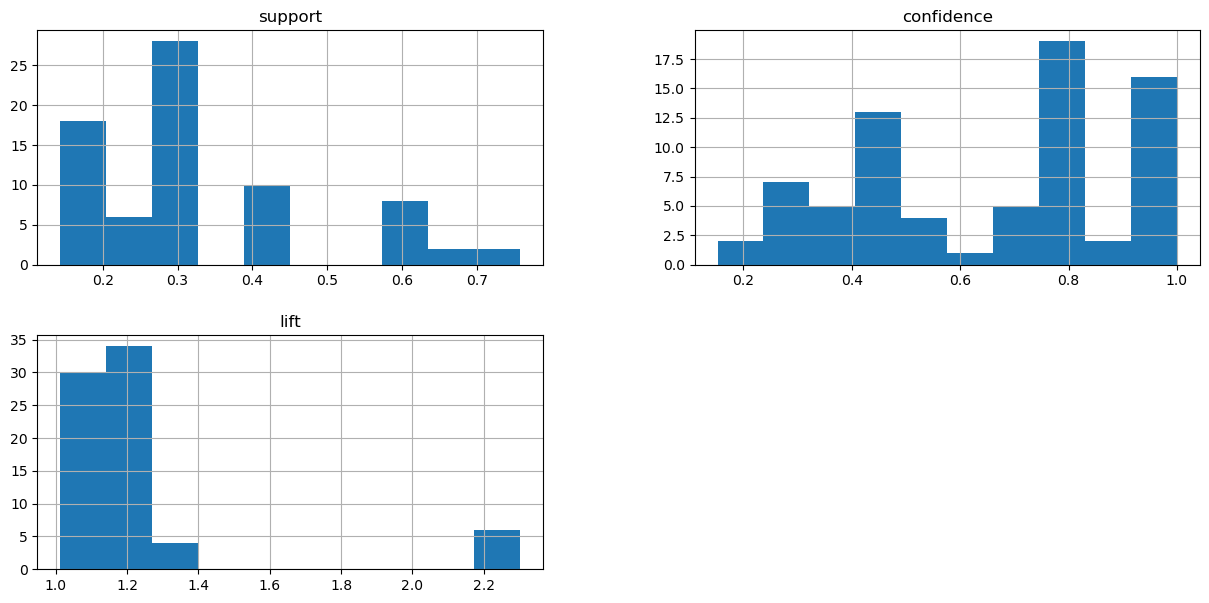

In [15]:
import matplotlib.pyplot as plt
rules[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()